In [ ]:
import numpy as np

**DISTANCE FUNCTIONS**

In [ ]:
def Distance1(s1,s2):
  if len(s1)<len(s2):
    s1,s2=s2,s1
  sum1=0
  for i in range(len(s2)):
    if s1[i]==s2[i]:
      sum1=sum1
    else:
      sum1=sum1+1/pow(2,i)
  for i in range(len(s2),len(s1)):
    sum1=sum1+1/pow(2,i)
  return sum1


def Distance2(s1,s2):
  if len(s1) < len(s2):
        s1, s2 = s2, s1
  m=0
  for i in range(len(s2)):
    if s1[i] != s2[i]:
      m=i
      break
  sum2=0
  if m!=0:
    for i in range(m,len(s1)):
      sum2=sum2+1/pow(2,i-m)
      sum2=sum2/m
  else:
    sum2=float('inf')
  return sum2


def Distance3(s1,s2):
  if len(s1) < len(s2):
        s1, s2 = s2, s1
  m=0
  for i in range(len(s2)):
    if s1[i] != s2[i]:
      m=i
      break
  sum3=0
  if m!=0:
    for i in range(m,len(s1)):
      sum3=sum3+1/pow(2,i-m)
      sum3=sum3/m
  else:
    sum3=float('inf')
  return (sum3)*(len(s1)-m)


def Distance4(s1,s2):
  if len(s1) < len(s2):
        s1, s2 = s2, s1
  m=0
  for i in range(len(s2)):
    if s1[i] != s2[i]:
      m=i
      break
  sum4=0
  if m!=0:
    for i in range(m,len(s1)):
      sum4=sum4+1/pow(2,i-m)
  else:
    sum4=float('inf')
  return (sum4/len(s1))*(len(s1)-m)

In [ ]:
from google.colab import files
files.upload()

Saving stemming-assignment.txt to stemming-assignment.txt


{'stemming-assignment.txt': b'a\naaron\nabaissiez\nabandon\nabandoned\nabase\nabash\nabate\nabated\nabatement\nabatements\nabates\nabbess\nabbey\nabbeys\nabbominable\nabbot\nabbots\nabbreviated\nabed\nabel\naberga\nabergavenny\nabet\nabetting\nabhominable\nabhor\nabhorr\nabhorred\nabhorring\nabhors\nabhorson\nabide\nabides\nabilities\nability\nabject\nabjectly\nabjects\nabjur\nabjure\nable\nabler\naboard\nabode\naboded\nabodements\naboding\nabominable\nabominably\nabominations\nabortive\nabortives\nabound\nabounding\nabout\nabove\nabr\nabraham\nabram\nabreast\nabridg\nabridge\nabridged\nabridgment\nabroach\nabroad\nabrogate\nabrook\nabrupt\nabruption\nabruptly\nabsence\nabsent\nabsey\nabsolute\nabsolutely\nabsolv\nabsolver\nabstains\nabstemious\nabstinence\nabstract\nabsurd\nabsyrtus\nabundance\nabundant\nabundantly\nabus\nabuse\nabused\nabuser\nabuses\nabusing\nabutting\naby\nabysm\nac\nacademe\nacademes\naccent\naccents\naccept\nacceptable\nacceptance\naccepted\naccepts\naccess\nacce

**HIERARCHIAL CLUSTERING DENDOGRAM FOR DISTANCE1**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster,ward
import matplotlib.pyplot as plt
import sys
import codecs
sim_list = []
sim_matrix = []
data_list = [line.rstrip('\n') for line in codecs.open("stemming-assignment.txt", "r", "utf-8")]#Unicode Transformation Format
data_list = [line.split('   ') for line in data_list]
data_list=data_list[:20000]
len_list = len(data_list)
label_list = [data_list[l][-1] for l in range(0,len(data_list)-1)]
text_list = [data_list[l][0] for l in range(0,len(data_list)-1)] 

for i in range(0, len_list-1):
    pivot = text_list[i]
    for j in range(0, len_list-1):
      sim = Distance1(pivot, text_list[j]) # calcurate similarity(distance)
      sim_list.append(sim)
      if j == len_list-2:
        sim_matrix.append(sim_list)
        sim_list = []
print("completed1")

completed1


**NO OF CLUSTERS VS THRESHOLD GRAPH**

In [ ]:
from sklearn.cluster import  AgglomerativeClustering
nos_of_clusters=[]
threshold=np.arange(0,2,0.25)
for s in threshold:
  clustering=AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='true', linkage='ward', distance_threshold=s)
  z=clustering.fit_predict(sim_matrix)
  nos_of_clusters.append(np.max(z))

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance ma

In [ ]:
plt.plot(threshold,nos_of_clusters)
plt.xlabel('threshold')
plt.ylabel('no_of_clusters')
plt.show()

**FINDING NO OF CLUSTERS**

In [ ]:
largestgap=np.argmin(np.diff(nos_of_clusters))
clusters=largestgap+1
print(nos_of_clusters[clusters])

**DENDOGRAM FOR DISTANCE1**

completed1


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


completed2


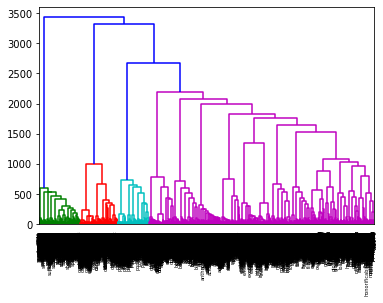

In [ ]:
print("completed1")
linkage_matrix =ward(sim_matrix)               
print("completed2")
dendrogram(linkage_matrix, labels=label_list)
plt.show()

**NO OF CLUSTERS IS 15000**

**MAKING INTO CLUSTERS AND FINDING NO OF WORDS IN CLUSTER AND ROOTWORD OF EACH CLUSTER**

In [ ]:
clustering = AgglomerativeClustering(n_clusters=15000)
cluster=clustering.fit(sim_matrix)
finalcluster=[]
clust=[]
for i in range(15000):
        clust0=np.unique(words[np.where(cluster.labels_==i)])
        mini0=10000
        temp0=[]
        for w in clust0:
          if len(w)<mini0:
            mini0=len(w)
            temp0.append(w)
        k=len(temp0)
        finalcluster.append(clust0)
        clust0=[]

**DENDOGRAM FOR DISTANCE 2**

THE RAM SIZE IS EXCEEDING IF RUNNING IN SAME NOTEBOOK SO I HAVE RUN AND SEEN ON DIFFERENT NOTEBOOKS AND HAD WRITTEN THE FUNCTIONS HERE

In [ ]:
sim_list2 = []
sim_matrix2 = []

for i in range(0, len_list-1):
    pivot = text_list[i]
    for j in range(0, len_list-1):
      sim = Distance2(pivot, text_list[j]) # calcurate similarity(distance)
      sim_list.append(sim)
      if j == len_list-2:
        sim_matrix2.append(sim_list2)
        sim_list2 = []
print("completed1")
linkage_matrix2 =ward(sim_matrix2)               
print("completed2")
dendrogram(linkage_matrix2, labels=label_list).
plt.show()

In [ ]:
from sklearn.cluster import  AgglomerativeClustering
nos_of_clusters2=[]
threshold=np.arange(0,2,0.25)
for s in threshold:
  clustering2=AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='true', linkage='ward', distance_threshold=s)
  z=clustering2.fit_predict(sim_matrix2)
  nos_of_clusters2.append(np.max(z))

**DENDOGRAM FOR DISTANCE 3**

In [ ]:
sim_list3 = []
sim_matrix3 = []

for i in range(0, len_list-1):
    pivot = text_list[i]
    for j in range(0, len_list-1):
      sim = Distance3(pivot, text_list[j]) # calcurate similarity(distance)
      sim_list.append(sim)
      if j == len_list-2:
        sim_matrix3.append(sim_list3)
        sim_list3 = []
print("completed1")
linkage_matrix3 =ward(sim_matrix3)               
print("completed2")
dendrogram(linkage_matrix3, labels=label_list).
plt.show()

In [ ]:
from sklearn.cluster import  AgglomerativeClustering
nos_of_clusters3=[]
threshold=np.arange(0,2,0.25)
for s in threshold:
  clustering3=AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='true', linkage='ward', distance_threshold=s)
  z=clustering3.fit_predict(sim_matrix3)
  nos_of_clusters3.append(np.max(z))

**DENDOGRAM FOR DISTANCE 4**

In [ ]:
sim_list4 = []
sim_matrix4 = []

for i in range(0, len_list-1):
    pivot = text_list[i]
    for j in range(0, len_list-1):
      sim = Distance4(pivot, text_list[j]) # calcurate similarity(distance)
      sim_list.append(sim)
      if j == len_list-2:
        sim_matrix4.append(sim_list4)
        sim_list4 = []
print("completed1")
linkage_matrix4 =ward(sim_matrix4)               
print("completed2")
dendrogram(linkage_matrix4, labels=label_list).
plt.show()

In [ ]:
from sklearn.cluster import  AgglomerativeClustering
nos_of_clusters4=[]
threshold=np.arange(0,2,0.25)
for s in threshold:
  clustering4=AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='true', linkage='ward', distance_threshold=s)
  z=clustering4.fit_predict(sim_matrix4)
  nos_of_clusters.append(np.max(z))

**PORTER STEMMER**

In [ ]:
with open('stemming-assignment.txt', 'r') as f:
    label_list=f.readlines()[:-1]

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer 
porter_list=[]
for w in label_list[:200]:
    ps = PorterStemmer()
    porter_list.append(ps.stem(w.strip())) 
    print(w, " : ", ps.stem(w.strip()))

a
  :  a
aaron
  :  aaron
abaissiez
  :  abaissiez
abandon
  :  abandon
abandoned
  :  abandon
abase
  :  abas
abash
  :  abash
abate
  :  abat
abated
  :  abat
abatement
  :  abat
abatements
  :  abat
abates
  :  abat
abbess
  :  abbess
abbey
  :  abbey
abbeys
  :  abbey
abbominable
  :  abbomin
abbot
  :  abbot
abbots
  :  abbot
abbreviated
  :  abbrevi
abed
  :  abe
abel
  :  abel
aberga
  :  aberga
abergavenny
  :  abergavenni
abet
  :  abet
abetting
  :  abet
abhominable
  :  abhomin
abhor
  :  abhor
abhorr
  :  abhorr
abhorred
  :  abhor
abhorring
  :  abhor
abhors
  :  abhor
abhorson
  :  abhorson
abide
  :  abid
abides
  :  abid
abilities
  :  abil
ability
  :  abil
abject
  :  abject
abjectly
  :  abjectli
abjects
  :  abject
abjur
  :  abjur
abjure
  :  abjur
able
  :  abl
abler
  :  abler
aboard
  :  aboard
abode
  :  abod
aboded
  :  abod
abodements
  :  abod
aboding
  :  abod
abominable
  :  abomin
abominably
  :  abomin
abominations
  :  abomin
abortive
  :  abort
abortiv